# Fraud Detection on Bank Payments


1. [Exploratory Data Analysis (EDA)](#Explaratory-Data-Analysis)
><b>Overview</b>: Perform an EDA on the data and try to gain some insight from it
2. [Data Preprocessing](#Data-Preprocessing)
><b>Overview</b>: Preprocessing the data and prepare for the training.
3. [Oversampling with SMOTE](#K-Neighbours-Classifier)
><b>Overview</b>: Oversampling with SMOTE
4. [K-Neighbours Classifier](#K-Neighbours-Classifier)
><b>Overview</b>: Defining and training model K-means
5. [Random Forest Classifier](#Random-Forest-Classifier)
><b>Overview</b>: Defining and training model Random Forest
6. [XGBoost Classifier](#XGBoost-Classifier)
><b>Overview</b>: Defining and training model XGBoost

In [5]:
## Data loading, processing and for more
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# set seaborn style because it prettier
sns.set()

## Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

## Models
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

The given dataset contains a table with 9 columns representing different features and one column representing the target variable. The features are as follows:

1.Step: This column indicates the number of days since the start of the simulation, with a total of 180 steps, which is equivalent to approximately 6 months of simulation.

2.Customer: This column represents the identification number of the customer.

3.zipCodeOrigin: It denotes the zip code of the source or origin.

4.Merchant: This column contains the identification number of the merchant.

5.zipMerchant: It represents the zip code of the merchant.

6.Age: This column categorizes the age into different groups:

0: Less than or equal to 18 years old

1: 19-25 years old

2: 26-35 years old

3: 36-45 years old

4: 46-55 years old

5: 56-65 years old

6: Older than 65 years old

U: Unknown age

7.Gender: It indicates the gender of the customer:

E: Enterprise

F: Female

M: Male

U: Unknown gender

Category: This column represents the category of the purchase. The specific categories will be discussed later in the analysis.

Amount: It signifies the amount of the purchase.

Fraud: This is the target variable that indicates whether a transaction is fraudulent (1) or benign (0).

Reading the data from csv file and show the first 5 rows

In [6]:
data = pd.read_csv("data.csv")
data.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


Show the information of data frame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


The given code creates two separate dataframes, one containing fraudulent data and the other containing non-fraudulent data. It then generates a count plot to visualize the count of fraudulent payments and displays the total number of normal and fraudulent examples in the data. The commented line provides an alternative way to obtain the count of fraudulent payments.

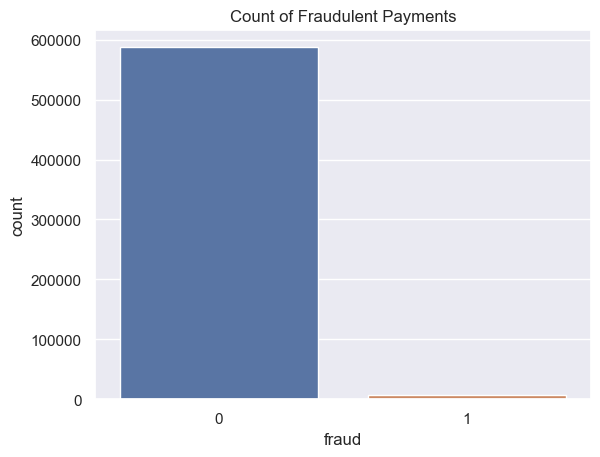

Number of normal examples:  587443
Number of fradulent examples:  7200


In [8]:
# Create two dataframes with fraud and non-fraud data
df_fraud = data.loc[data.fraud == 1]
df_non_fraud = data.loc[data.fraud == 0]

sns.countplot(x="fraud",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.fraud.count())
print("Number of fradulent examples: ",df_fraud.fraud.count())
#print(data.fraud.value_counts()) # does the same thing above

The given code calculates and prints the mean feature values of the 'amount' and 'fraud' columns for each category in the dataset, providing insights into the average values within each category.

In [9]:
print("Mean feature values per category",data.groupby('category')['amount','fraud'].mean())

Mean feature values per category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


C:\Users\dell\AppData\Local\Temp\ipykernel_8732\1703450169.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print("Mean feature values per category",data.groupby('category')['amount','fraud'].mean())


The given code concatenates three different groupby calculations for 'amount' and 'fraud' columns based on the 'category' column. It creates a new DataFrame that includes the mean amount for fraudulent and non-fraudulent data, as well as the percentage of fraud for each category. The resulting DataFrame is then sorted based on the 'Non-Fraudulent' column values.

In [10]:
# Create two dataframes with fraud and non-fraud data
pd.concat([df_fraud.groupby('category')['amount'].mean(),df_non_fraud.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
category,,,
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000


The given code creates a boxplot visualization of the amount spent in different categories for both fraud and non-fraud data. The plot is adjusted to have a larger size, a specific y-axis limit, a legend, and a title to provide insights into the distribution of amounts spent in each category.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


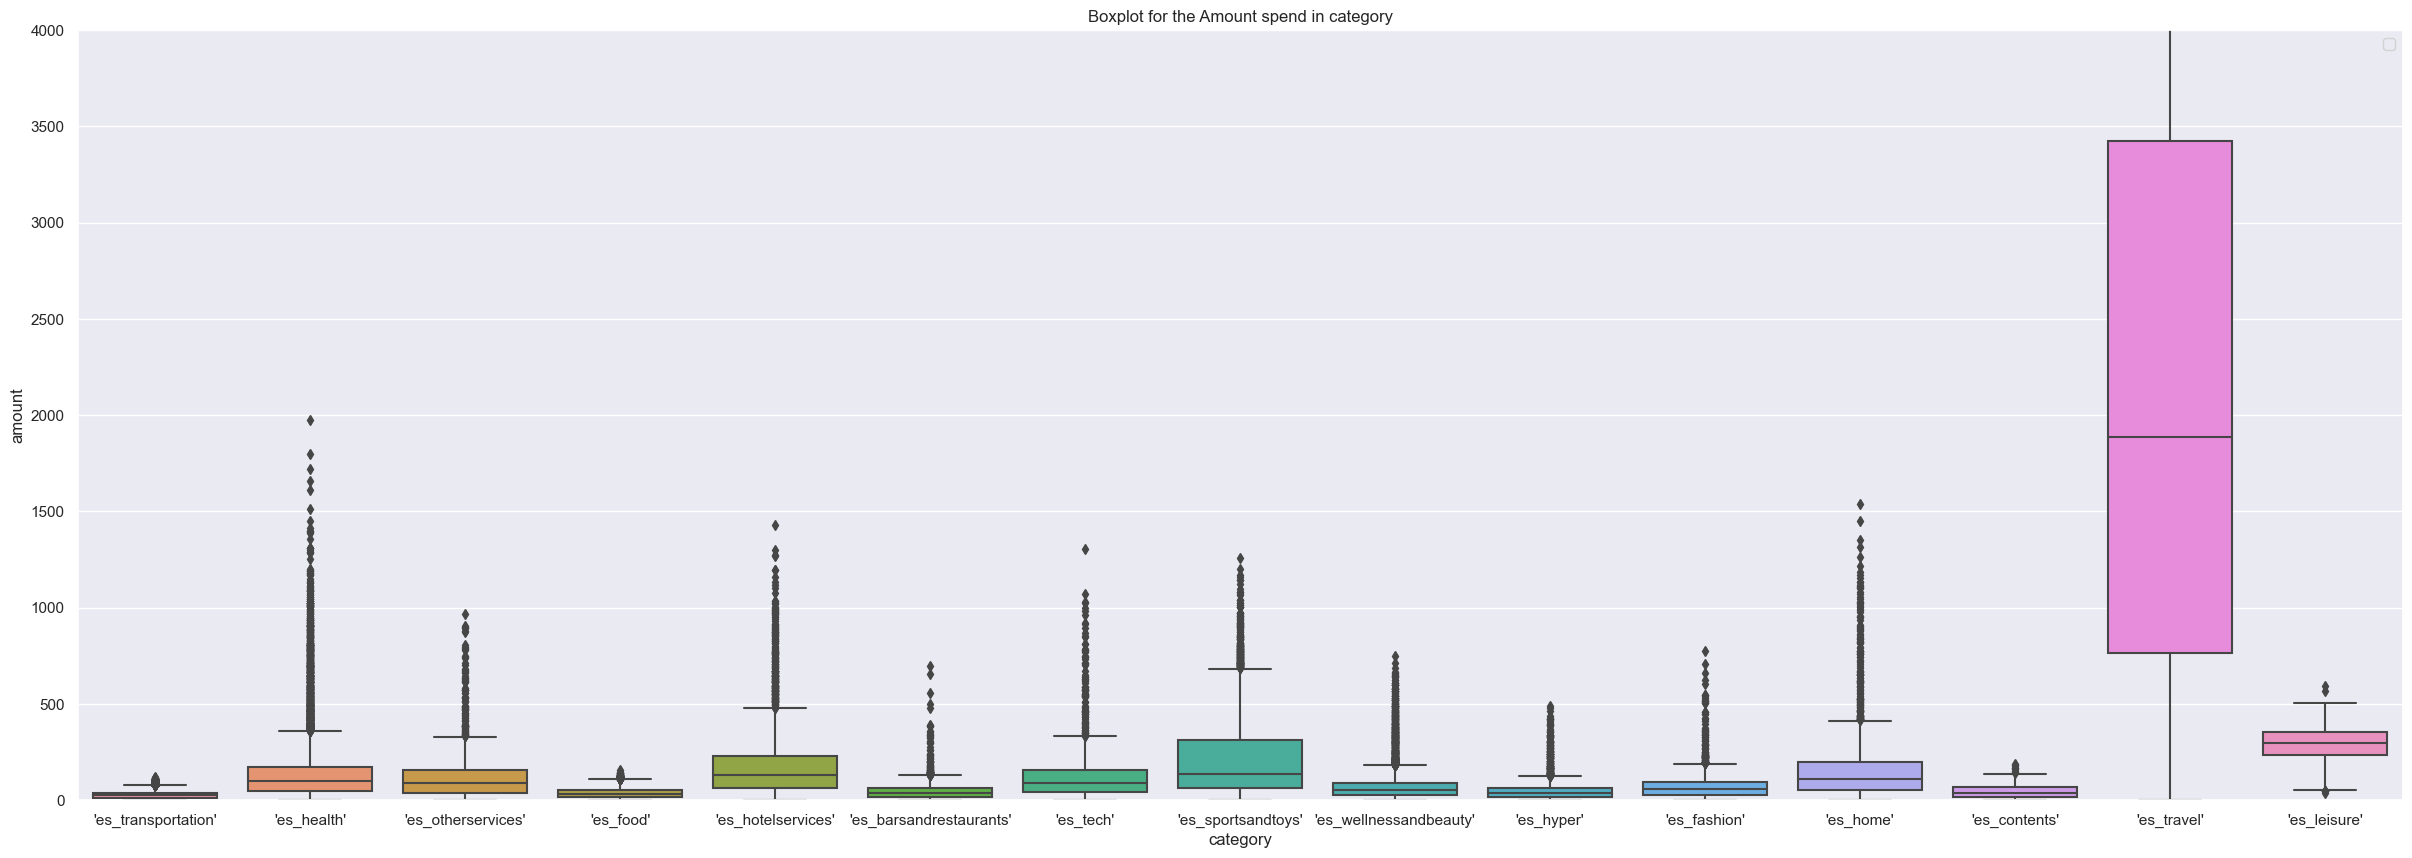

In [11]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

The given code plots histograms of the amounts for fraudulent and non-fraudulent payments. The histograms are displayed with different transparency levels and labeled accordingly. The plot has a specific title, y-axis limit, x-axis limit, legend, and is shown to visualize the distribution of amounts for both types of payments.

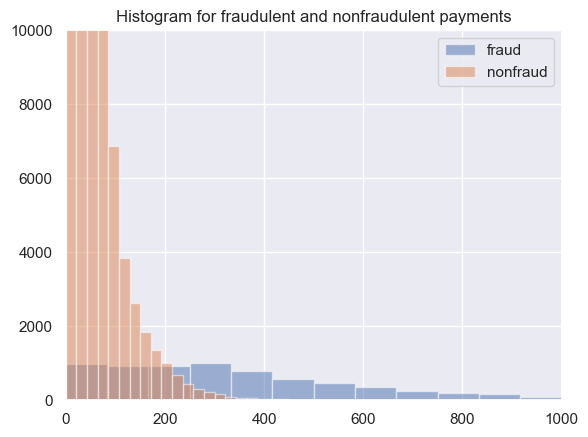

In [12]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.hist(df_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

The given code calculates the percentage of fraud for each age group in the dataset, converts it into a DataFrame, and then sorts the data based on the fraud percentage in ascending order. The resulting DataFrame provides information about the fraud percentage for each age group, with the age group labeled as "Age" and the fraud percentage labeled as "Fraud Percent".

In [13]:
print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       0.594228
6  '6'       0.974826
5  '5'       1.095112
1  '1'       1.185254
3  '3'       1.192815
2  '2'       1.251401
4  '4'       1.293281
0  '0'       1.957586


# Data Preprocessing

The given code prints the number of unique values in the 'zipCodeOri' and 'zipMerchant' columns of the dataset. Then, it creates a new DataFrame called 'data_reduced' by dropping the 'zipcodeOri' and 'zipMerchant' columns from the original dataset, as these columns contain only one unique value each.

In [14]:
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


The given code retrieves and prints the column names of the 'data_reduced' DataFrame, providing a list of the column names present in the reduced dataset.

In [15]:
data_reduced.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

The given code identifies the columns in the 'data_reduced' DataFrame that have an 'object' data type and converts them to the categorical data type. Then, it converts the categorical values to numeric values using label encoding. Finally, it displays the first five rows of the modified 'data_reduced' DataFrame.

In [16]:
# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


The given code assigns the 'data_reduced' DataFrame without the 'fraud' column to the variable 'X', representing the input features. It assigns the 'fraud' column of the original 'data' DataFrame to the variable 'y', representing the target variable. Then, it prints the first few rows of both 'X' and 'y'.

In [17]:
X = data_reduced.drop(['fraud'],axis=1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [18]:
y[y==1].count()

7200

# Oversampling with SMOTE

The below code performs oversampling of the minority class using SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. It creates synthetic samples by interpolating between existing samples, resulting in balanced classes. The code then prints the value counts of the target variable after oversampling to verify the balanced distribution.

In [19]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res.value_counts())

fraud
0        587443
1        587443
dtype: int64


The given code splits the oversampled data into training and testing sets using the train_test_split function. It assigns 70% of the data to the training set and 30% to the testing set, ensuring that the class distribution is maintained through stratified sampling.

In [20]:
# I won't do cross validation since we have a lot of instances
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)

The given code defines a function called plot_roc_auc that takes the actual target values (y_test) and predicted probabilities (preds) as inputs and plots the Receiver Operating Characteristic (ROC) curve. The ROC curve is used to evaluate the performance of a binary classification model, and it shows the trade-off between the true positive rate and false positive rate.

In [21]:
# %% Function for plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

The given code calculates the base accuracy score that needs to be surpassed in order for the model to perform better than simply predicting all instances as non-fraudulent. It divides the count of non-fraudulent instances by the sum of the counts of non-fraudulent and fraudulent instances, and then multiplies by 100 to obtain a percentage. This base accuracy score represents the accuracy achieved by a naive classifier that always predicts non-fraudulent.

In [22]:
# The base score should be better than predicting always non-fraduelent
print("Base accuracy score we must beat is: ",
      df_non_fraud.fraud.count()/ np.add(df_non_fraud.fraud.count(),df_fraud.fraud.count()) * 100)

Base accuracy score we must beat is:  98.7891894800746


# K-Neighbours Classifier

The given code implements the K-Nearest Neighbors (KNN) algorithm for classification. It creates a KNN classifier with 5 neighbors using the Manhattan distance metric, trains the classifier on the training data, and makes predictions on the test data. It then prints the classification report, which includes precision, recall, F1-score, and support, as well as the confusion matrix. Finally, it plots the ROC curve to evaluate the performance of the KNN model.

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    176233
           1       0.98      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of K-Nearest Neigbours: 
 [[171999   4234]
 [   362 175871]]


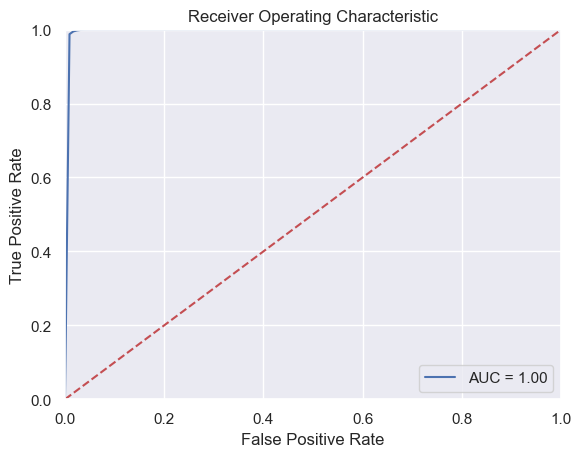

In [23]:
# %% K-ello Neigbors

knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, knn.predict_proba(X_test)[:,1])

# Random Forest Classifier

The given code implements the Random Forest Classifier algorithm for classification. It creates a Random Forest classifier with 100 decision trees, a maximum depth of 8, and a balanced class weight. The classifier is trained on the training data and used to make predictions on the test data. It then prints the classification report, which includes precision, recall, F1-score, and support, as well as the confusion matrix. Finally, it plots the ROC curve to evaluate the performance of the Random Forest classifier.

C:\Users\dell\AppData\Local\Temp\ipykernel_8732\2368093465.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466

Confusion Matrix of Random Forest Classifier: 
 [[170106   6127]
 [  1079 175154]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


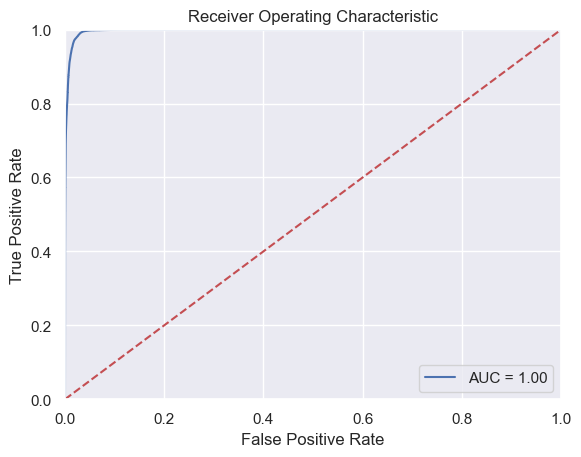

In [24]:
# %% Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, rf_clf.predict_proba(X_test)[:,1])

# XGBoost Classifier

The given code implements the XGBoost Classifier algorithm for classification. It creates an XGBoost classifier with specific parameter settings. The classifier is trained on the training data and used to make predictions on the test data. It then prints the classification report, which includes precision, recall, F1-score, and support, as well as the confusion matrix. Finally, it plots the ROC curve to evaluate the performance of the XGBoost classifier.

[15:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    176233
           1       0.99      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of XGBoost: 
 [[174033   2200]
 [   775 175458]]


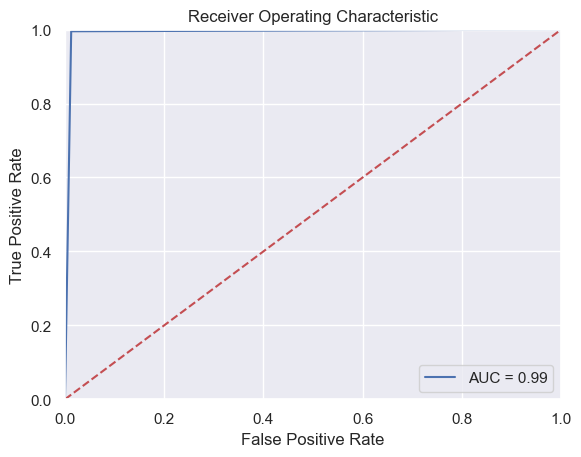

In [25]:
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400,
                                objective="binary:hinge", booster='gbtree',
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1,
                                scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=1)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, XGBoost_CLF.predict_proba(X_test)[:,1])